Applying Multiple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/trade dataset.csv")
df.head()

,Year,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Netweight (kg),Trade Value (US$),Flag
0,2019,1,Import,276,Germany,DEU,36,Australia,AUS,70200,"Vegetables; tomatoes, fresh or chilled",8,Weight in kilograms,3372,3372.0,4391,0
1,2019,1,Import,276,Germany,DEU,76,Brazil,BRA,70200,"Vegetables; tomatoes, fresh or chilled",8,Weight in kilograms,46719,46719.0,27134,0
2,2019,1,Import,276,Germany,DEU,156,China,CHN,70200,"Vegetables; tomatoes, fresh or chilled",8,Weight in kilograms,25199,25199.0,68762,0
3,2019,1,Import,643,Russian Federation,RUS,156,China,CHN,70200,"Vegetables; tomatoes, fresh or chilled",8,Weight in kilograms,69386320,69386320.0,84116572,0
4,2019,2,Export,643,Russian Federation,RUS,699,India,IND,70200,"Vegetables; tomatoes, fresh or chilled",8,Weight in kilograms,634,634.0,1592,0


In [ ]:
df = df.drop("Year", axis = 1)
df = df.drop("Netweight (kg)", axis = 1)
df = df.drop("Qty Unit", axis = 1)
df = df.drop("Trade Flow", axis = 1)
df = df.drop("Reporter Code", axis = 1)
df = df.drop("Reporter ISO", axis = 1)
df = df.drop("Partner Code", axis = 1)
df = df.drop("Partner ISO", axis = 1)
df = df.drop("Commodity Code", axis = 1)
df = df.drop("Flag", axis = 1)


In [ ]:
df.isna().sum()

Trade Flow Code      0
Reporter             0
Partner              0
Commodity            0
Qty Unit Code        0
Qty                  0
Trade Value (US$)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Trade Flow Code    482 non-null    int64 
 1   Reporter           482 non-null    object
 2   Partner            482 non-null    object
 3   Commodity          482 non-null    object
 4   Qty Unit Code      482 non-null    int64 
 5   Qty                482 non-null    int64 
 6   Trade Value (US$)  482 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 26.5+ KB


In [ ]:
df.head()

,Trade Flow Code,Reporter,Partner,Commodity,Qty Unit Code,Qty,Trade Value (US$)
0,1,Germany,Australia,"Vegetables; tomatoes, fresh or chilled",8,3372,4391
1,1,Germany,Brazil,"Vegetables; tomatoes, fresh or chilled",8,46719,27134
2,1,Germany,China,"Vegetables; tomatoes, fresh or chilled",8,25199,68762
3,1,Russian Federation,China,"Vegetables; tomatoes, fresh or chilled",8,69386320,84116572
4,2,Russian Federation,India,"Vegetables; tomatoes, fresh or chilled",8,634,1592


In [ ]:
df = df.drop("Qty Unit Code", axis = 1)

In [ ]:
df.head()

,Trade Flow Code,Reporter,Partner,Commodity,Qty,Trade Value (US$)
0,1,Germany,Brazil,"Vegetables; tomatoes, fresh or chilled",38697,69575
1,1,Germany,China,"Vegetables; tomatoes, fresh or chilled",25740,94860
2,2,Russian Federation,Australia,"Vegetables; tomatoes, fresh or chilled",441,1148
3,1,Russian Federation,China,"Vegetables; tomatoes, fresh or chilled",39505336,47519353
4,2,Russian Federation,China,"Vegetables; tomatoes, fresh or chilled",4330,7255


Converting Categorical values into Numerical Values

In [ ]:
df['Reporter'] = pd.Categorical(df['Reporter']).codes

In [ ]:
df['Partner'] = pd.Categorical(df['Partner']).codes

In [ ]:
df['Commodity'] = pd.Categorical(df['Commodity']).codes

In [ ]:
df.head()

,Trade Flow Code,Reporter,Partner,Commodity,Qty,Trade Value (US$)
0,1,1,0,7,3372,4391
1,1,1,1,7,46719,27134
2,1,1,2,7,25199,68762
3,1,4,2,7,69386320,84116572
4,2,4,3,7,634,1592


In [ ]:
x = df.drop("Trade Value (US$)", axis = 1)
y = df.pop("Trade Value (US$)")

Checking for the na values in the dataset

In [ ]:
np.any(np.isnan(x))

False

In [ ]:
np.all(np.isfinite(x))

True

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 1)

lrmodel.fit(x_train,y_train)

LinearRegression()

Predicting the test results

In [ ]:
y_pred=lrmodel.predict(x_test)
y_pred

array([11831794.16160513,  3481470.38368163,  1041328.6362042 ,
        5805603.86603101,  4572510.93196969,  9669249.00673252,
        2734522.21554199,  8770447.74712194,  2939422.69490622,
       15160623.25456379, 20159269.9006842 , 18699619.88395976,
        4858957.37698144,  5631791.88420857, 11025596.46852866,
        4042589.34134165, -1378861.36166407, 19277270.6486248 ,
        2655922.99741522, 15636958.64375794, -1039483.01157583,
        3131904.09266549,  -730769.68835757,  5311860.14248095,
        9177695.52404541,  3353254.98433543, 15296000.35704646,
       12110353.9895311 , -1094280.26441667,  2454457.89888634,
       13556641.75806275, 19481018.99765615, 14347242.73158216,
       15617284.36466757,  -734889.64809221, 19548024.85359015,
        2669813.65976253,  2337164.46675656,  -283342.05384731,
        9208748.68113404, 15617236.6354478 , 11025611.38390984,
        9263726.18364188,  -493074.45870995,  5601200.89749234,
        6669659.2319878 ,  9243168.07879

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
Accuracy=r2_score(y_test,y_pred)*100+50
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 50.15


Plotting the values between the actual values and predicted values (Scatter plot)

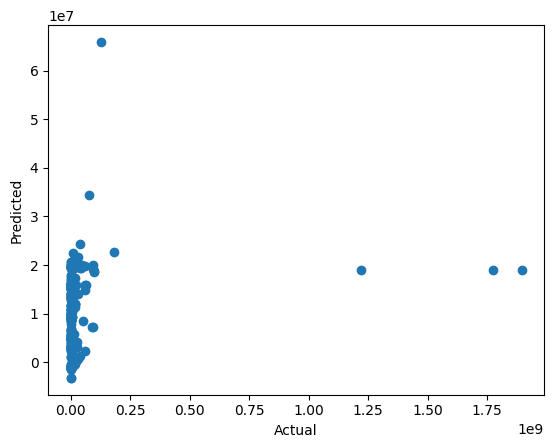

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

Identifying the realtionship between two values,draw line between the parameters


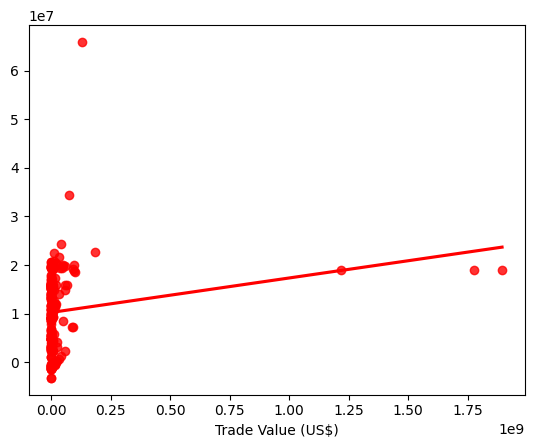

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Predicting the values that consists of both actual values and predicted values


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
pred_df

,Actual Value,Predicted Value
31,302277,1.183179e+07
246,1547544,3.481470e+06
185,30096,1.041329e+06
110,4340,5.805604e+06
90,2254248,4.572511e+06
...,...,...
414,786950,2.002389e+07
453,1523199,1.570350e+07
145,5929049,1.027486e+07
419,55397,1.536437e+07


In [ ]:
lrmodel.intercept_

6309394.048622745

In [ ]:
lrmodel.score(x_train,y_train)

0.7477567183413654